### Activation Function: Is the function that is being applied on the {input * weight.t + bias} output.
* Every layer after input layer, i.e., hidden layers and output layer is going to have some activation function associated with each neurons
* Generally we use one kind of activation function for all hidden layers and a different kind for output layer
* We sometimes avoid Sigmoid activation function as it is associated with vanishing gradient problem

 #### Problem with ReLU
 * The **Problem with ReLU activation function in the output layer** is that, it will switch off all the negative values. So when we will go for learning from current errors, we would actually have lots of 0s, instead of actual negative magnitude (say -1 or -1000000).

 * **The solution is use of exponential (euler's e^x)**. This specially helps cause, it just doesn't make negative values of x, 0, instead it outputs a very small number corresponding to negative numbers.
 





#### Softmax Function
*   Input --> Exponentiation (e^X) --> Normalisation (e^xi/sum(e^j)) --> Output
*   softmax is actually the combination of [Exponentiation and Normalization]
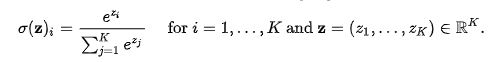


## [Input layer with 2 Neurons] --> [Output layer with 5 neurons]
* ##### Batch size = 300; i.e., 300 input samples
* ##### Input layer --> 2 neurons; each input sample is of shape (2,) vector
* ##### Hidden layer --> 3 neurons; 
* ##### Output layer --> 3 neurons; thus 3 weight vectors with shape (3,)
* ##### Biases1, biases2 --> 3 biases associated with each output neuron

In [ ]:
!pip install nnfs

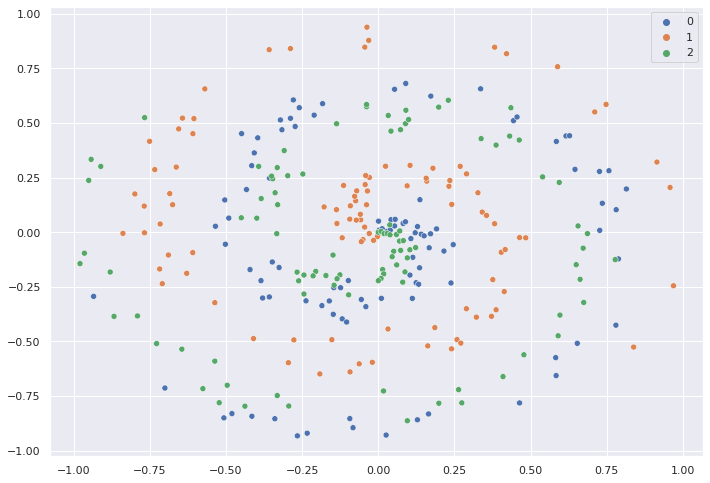

In [ ]:
import numpy as np
import nnfs
from nnfs.datasets import spiral_data
import matplotlib.pyplot as plt
import seaborn as sns

nnfs.init() # sets the seed

# features and target variable split
X,y = spiral_data(100, 3) # 300 input samples; 3 categories
# type(X) -- <class 'numpy.ndarray'>

# plotting the data point to get better understanding of spread
sns.set(rc={'figure.figsize':(11.7,8.27)})

sns.scatterplot(x = X[:,0], y = X[:,1], hue = y, palette = "deep")

In [ ]:
# class to add layers to our NN
class Layer_Dense:
  def __init__(self, cur_neurons, next_neurons):
    # cur_neurons - Number of neurons in current layer
    # next_neurons - Number of neurons in next layer
    # np.random.randn - Normally distributed data points in a matrix of shape(cur_neurons, next_neurons)
    # biases - array of zeros of shape (1,next_neurons)

    self.weights = 0.1 * np.random.randn(next_neurons, cur_neurons)
    self.biases = np.zeros((1, next_neurons))
    self.output = None

  def forward(self, inputs):
    self.output = np.dot(inputs, self.weights.T) + self.biases


# class to define the ReLU-activation function
class Activation_ReLU:
  def __init__(self):
    self.output = None

  def forward(self, inputs):
    self.output = np.maximum(0, inputs)

# class to define the softmax activation function

class Activation_Softmax:
  def __init__(self):
    self.output = None

  def forward(self, inputs):
    # np.sum(exp_values, axis=1) # to find the sum for each input, in batched input
    # keepdims -- will keep the matrix dimension; if false, output will be in vector format

    # A big problem with exponentiation is that it reaches very large number (even inf) with increasing values of x.
    # So, another degree of normalization required before mean normalization
    # We subtract X values of each individual input vector, from the max X value of that vector
    # In this way, max value in an array will be 0, whose exponentiation is 1
    # So, y value basically will range between [0,1] 

    exp_values = np.exp(inputs - np.max(inputs, axis=1, keepdims = True))
    prob_normalization = exp_values / np.sum(exp_values, axis=1, keepdims= True)
    self.output = prob_normalization

# defining layers and activation functions
layer1 = Layer_Dense(2,3) # 2 input layer neurons since 2 input features; 3 hidden layer neurons
activation1 = Activation_ReLU()

layer2 = Layer_Dense(3,3) # 3 hidden layer neurons; 3 output layer neurons
activation_output = Activation_Softmax()

## Forward Propagation
layer1.forward(X)
activation1.forward(layer1.output)

layer2.forward(activation1.output)
activation_output.forward(layer2.output)

print(activation_output.output[: 10])

[[0.33333334 0.33333334 0.33333334]
 [0.33331478 0.33336207 0.33332312]
 [0.33332065 0.3333576  0.33332178]
 [0.33334717 0.33337012 0.3332827 ]
 [0.33335024 0.33337826 0.33327147]
 [0.3332064  0.33353007 0.33326355]
 [0.3333507  0.3333795  0.33326977]
 [0.3332729  0.3334319  0.33329517]
 [0.33330262 0.33341306 0.33328435]
 [0.33336106 0.333407   0.3332319 ]]


In [ ]:
activation_output.output.shape
# shape == (number of input samples, number of neurons in output layer)

(300, 3)

In [ ]:
len(activation_output.output[activation_output.output >= 0])

900